## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

## Read in Data

In [77]:
filename = "/Users/gandalf/Documents/data/data_users.csv"

df = pd.read_csv(filename, parse_dates=['created', 
                                        'updated', 
                                        'available', 
                                        'birthday', 
                                        'lastActive'])

df = df.fillna({'legacyId' : 'None',
                'about'    : '', 
                'birthday' : pd.to_datetime('1899-01-01'), 
                'latitude' : 0, 
                'longitude': 0})

df.head(2)

,id,legacyId,created,updated,hashedPassword,about,available,birthday,collegeId,email,...,numRoommates,onboarded,petsOk,pictureId,roomPostId,roomTypeId,smokingOk,term,username,work
0,1,None,2017-10-24 21:30:37,2017-10-24 21:30:37,kFvfDCnKfLKPDzZ6XrN4UaW6tPtP446TiuzysPua+58OS7...,,nan,1899-01-01,NaN,brads@qualityprocess.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0a9yOPKFSH,2017-06-19 03:31:08,2018-01-04 21:24:41,$2a$10$BJDpY38i1QXEWJEx1ifQU.JY55JfBhTgnTAmdjN...,,nan,1992-01-01,NaN,yuuki.sakamoto@hotmail.com,...,2.0,1.0,1.0,331.0,375.0,2.0,0.0,12.0,yuuki.sakamoto@hotmail.com,SEG


# CREATED

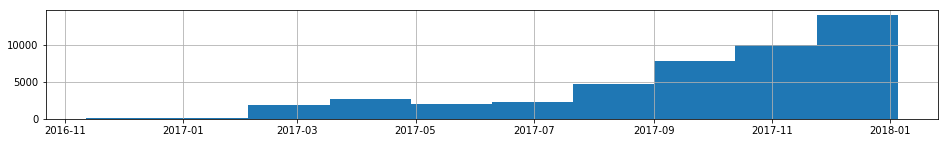

In [211]:
df.created.hist(figsize=(16,2));

# UPDATED

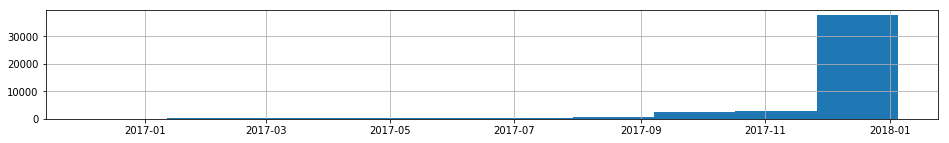

In [212]:
df# time with the app 

Date Updated - Last Active

(rough idea of how long users interact with the site (over days or months?)

df['time_with_site'] = df.lastActive-df.created
df.time_with_site.apply(lambda x: x.days).hist(bins=range(1,400));

# a lot of one day interactions (cut out for sake of visibility)
# strange peaks and drop off.updated.hist(figsize=(16,2));

# time until most recent edit 

Date Updated - Date Created

(rough idea of how long users interact with the site (over days or months?)

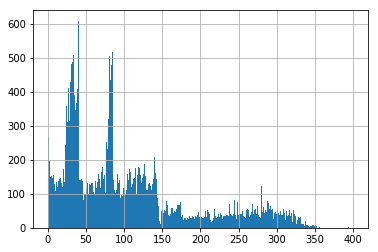

In [53]:
df['time_with_site'] = df.updated-df.created
df.time_with_site.apply(lambda x: x.days).hist(bins=range(1,400));

# a lot of one day interactions (cut out for sake of visibility)
# strange peaks and drop off

# ABOUT

## length

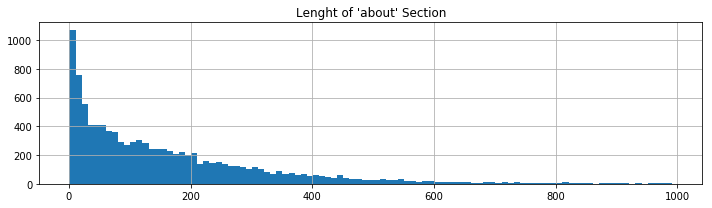

In [62]:
df['about_len'] = df['about'].apply(lambda x: len(x))
df.about_len.hist(bins=range(1, 1000, 10), figsize = [10, 3])
plt.title("Lenght of 'about' Section")
plt.tight_layout()

## percent responding

In [76]:
wth = df[df.about_len > 0].count()['about']
wthout = df[df.about_len == 0].count()['about']
print('total number of user entries: {}'.format(wth+wthout))
print('number with about sections: {}'.format(wth))
print('number without about sections: {}'.format(wthout))
print('percent with about sections: {}'.format(wth/(wth+wthout)))

total number of user entries: 45466
number with about sections: 10640
number without about sections: 34826
percent with about sections: 0.23402102670127128


# AVAILABLE

In [32]:
# df.available.dropna.hist(figsize=(16,2));
# would be nice to drop NaN more reasonably

# BIRTHDAY

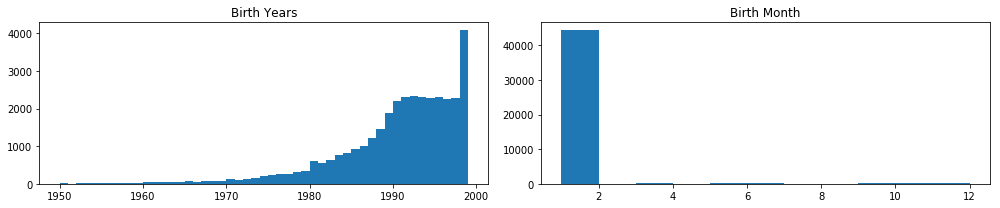

In [69]:
df['birth_year'] = df['birthday'].apply(lambda x: x.year)
df['birth_month'] = df['birthday'].apply(lambda x: x.month)

fig, ax = plt.subplots(1, ncols=2, figsize=(14, 3))

ax[0].hist(df.birth_year, bins=range(1950, 2000))
ax[0].set_title("Birth Years")

ax[1].hist(df.birth_month, bins=range(1, 13))
ax[1].set_title("Birth Month")

plt.tight_layout()

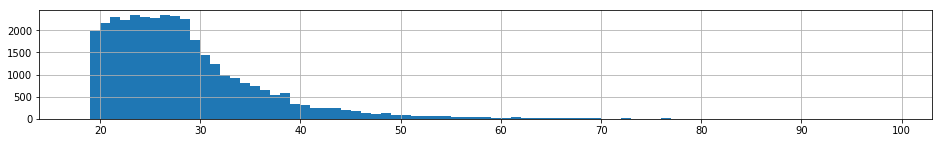

In [48]:
# age on Jan 1 2018
today = pd.to_datetime('2018-01-01')
df['age'] = (today-df['birthday'])/365

df.age.apply(lambda x: x.days).hist(bins=range(18,100), figsize=(16,2));

# LOCATION

In [128]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [190]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
loc_df = df[['longitude', 'latitude']]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)

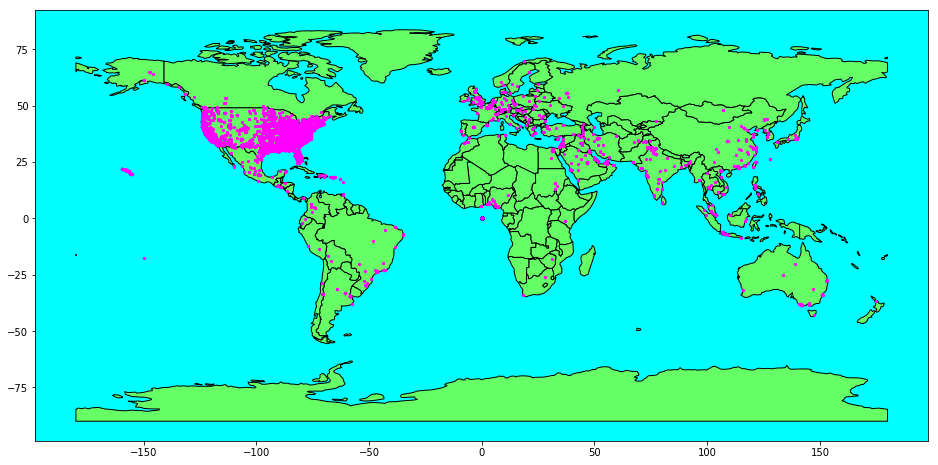

In [207]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

# time with the app 

Date Updated - Last Active

(rough idea of how long users interact with the site (over days or months?)

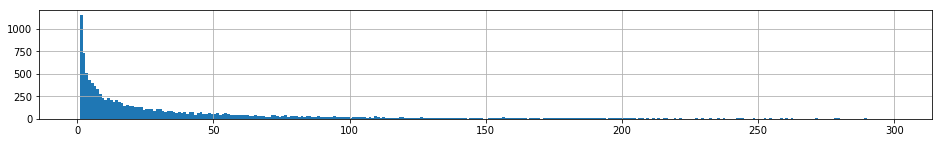

In [57]:
df['time_with_site'] = df.lastActive-df.created
df.time_with_site.apply(lambda x: x.days).hist(bins=range(1,300), figsize=(16,2));